In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import tensorflow.keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

In [2]:
abs_path = '/Users/alex/desktop/python_work/python_projects/NHL_Jersey_Classifiers/team_jersey_images/'

teams = [team for team in os.listdir(abs_path)]

In [3]:
df = pd.DataFrame(columns=['id', 'team'])

for team in teams:
        path = os.path.join(abs_path, team)
    
        for images in os.listdir(path):

            df2 = pd.DataFrame([[images, team]], columns=['id', 'team'])
            df = df.append(df2)

In [4]:
dummies = pd.get_dummies(df['team'])

In [5]:
df = pd.concat([df, dummies], axis=1)
df.reset_index(drop=True, inplace=True)
df.head()

,id,team,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,...,Philadelphia Flyers,Pittsburgh Penguins,San Jose Sharks,St. Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
0,ac4a5f88e8.jpg,Vancouver Canucks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,455b42f201.jpg,Vancouver Canucks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,c1cf83a1bf.jpg,Vancouver Canucks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,59f8a94088.jpg,Vancouver Canucks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,432926b45e.jpg,Vancouver Canucks,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
img_width, img_height = 150, 150

X = []

for team in tqdm(teams):
    path = os.path.join(abs_path, team)
    
    for images in os.listdir(path):
        img_path = os.path.join(path, images)
        img = image.load_img(img_path, target_size=(img_width, img_height, 3))
        img = image.img_to_array(img)
        img /= 255.0
        
        X.append(img)

X = np.array(X)

100%|██████████| 31/31 [00:34<00:00,  1.11s/it]


In [13]:
y = df.drop(['id', 'team'], axis=1)
y = y.to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
y_train.shape

(2508, 31)

In [54]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3, 3), activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.45))

model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='softmax'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(31, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)       

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [56]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
79/79 [==============================] - 57s 716ms/step - loss: 3.4364 - categorical_accuracy: 0.0279 - val_loss: 3.4373 - val_categorical_accuracy: 0.0239
Epoch 2/5
79/79 [==============================] - 54s 678ms/step - loss: 3.4224 - categorical_accuracy: 0.0347 - val_loss: 3.4390 - val_categorical_accuracy: 0.0175
Epoch 3/5
79/79 [==============================] - 52s 659ms/step - loss: 3.4006 - categorical_accuracy: 0.0419 - val_loss: 3.4408 - val_categorical_accuracy: 0.0287
Epoch 4/5
79/79 [==============================] - 52s 659ms/step - loss: 3.3821 - categorical_accuracy: 0.0514 - val_loss: 3.4353 - val_categorical_accuracy: 0.0318
Epoch 5/5
79/79 [==============================] - 51s 650ms/step - loss: 3.3229 - categorical_accuracy: 0.0538 - val_loss: 3.4174 - val_categorical_accuracy: 0.0557


In [27]:


training_data = []

def create_training_data():
    for team in teams:
        path = os.path.join(abs_path, team)
    

        for image in os.listdir(path):
            
            img = image.load_img(os.path.join(path, image), target_size=(img_width, img_height, 3))

            #img_array = cv2.imread(os.path.join(path, image))
            #new_array = cv2.resize(img_array, (img_width, img_height))
        

,id,team


In [67]:
test_pred = model.predict(X_test)[210]

classes_for_pred = df.columns[2:]

answer = np.argsort(test_pred)[-2:]
answer

array([22,  7])

In [70]:
classes_for_pred[7]

'Colorado Avalanche'

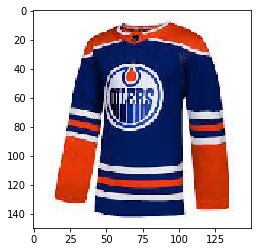

In [61]:
plt.imshow(X_test[210])

In [46]:
model.predict(X_test)[2]

array([7.8863621e-02, 9.0684414e-01, 1.4255420e-06, 1.9234419e-04,
       9.9999553e-01, 1.5944242e-04, 1.1228198e-01, 9.9839437e-01,
       1.2057681e-07, 6.9729090e-03, 9.9998617e-01, 5.8961391e-01,
       9.4133723e-01, 4.4713914e-03, 1.1778146e-02, 9.7618943e-01,
       2.5398624e-01, 3.0682910e-05, 6.0092437e-01, 2.4705631e-01,
       9.9201047e-01, 9.9918735e-01, 9.9856794e-01, 6.9001406e-02,
       6.4004534e-01, 1.5231073e-03, 7.3544097e-01, 6.9778419e-01,
       2.3401451e-01, 9.5843351e-01, 1.0862097e-01], dtype=float32)

In [2]:
abs_path = '/Users/alex/desktop/python_work/python_projects/NHL_Jersey_Classifiers'
os.chdir(abs_path+'/team_jersey_images')

jersey_array = []
team = []

for folder in os.listdir():
    
    if folder != '.DS_Store':
        os.chdir(abs_path+'/team_jersey_images/'+folder)

        an_image_home = PIL.Image.open(folder+"_home_jersey.png")
        image_sequence = an_image_home.getdata()
        home_image_array = np.array(image_sequence)

        jersey_array.append(home_image_array)
        team.append(folder)
        
        try:

            an_image_away = PIL.Image.open(folder+"_away_jersey.png")
            image_sequence = an_image_away.getdata()
            away_image_array = np.array(image_sequence)

            jersey_array.append(away_image_array)
            team.append(folder)
            
        except FileNotFoundError:
            pass
        
        try:
            an_image_alternate = PIL.Image.open(folder+"_alternate_jersey.png")
            image_sequence = an_image_alternate.getdata()
            alternate_image_array = np.array(image_sequence)
            
            jersey_array.append(alternate_image_array)
            team.append(folder)
            
        except FileNotFoundError:
            pass
        

In [3]:
jersey_array = np.asarray(jersey_array)

In [4]:
df = pd.DataFrame()

df['team'] = team

team = pd.get_dummies(df['team'])

In [5]:
X = jersey_array
y = team

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, team, test_size=0.2)

In [12]:
rows, cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)

y_train = y_train.reshape(y_train.shape[0], rows, cols, 1)
y_test = y_test.reshape(y_test.shape[0], rows, cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

ValueError: cannot reshape array of size 102060000 into shape (42,28,28,1)